In [1]:
import seaborn_plot_util
%matplotlib notebook
import re
import pickle
import numpy as np
import seaborn as sns
import pandas as pd
import spacy
from matplotlib import pyplot as plt
import sys
from scipy import stats
import seaborn_plot_util
import pprint
import json
import os
from pathlib import Path
import util
from importlib import reload

pp = pprint.PrettyPrinter(indent=4)
myprint = pp.pprint

nlp = spacy.load("en_core_web_md")

/home/madhu/dataset-analysis-new/code/seaborn_plot_util.py:10: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('display.max_colwidth', -1)


Saving the plot in  ../saves/vader_negation_only/vader_negation_only_dist_word_level_amz


/home/madhu/dataset-analysis-new/code/seaborn_plot_util.py:10: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('display.max_colwidth', -1)


<IPython.core.display.Javascript object>


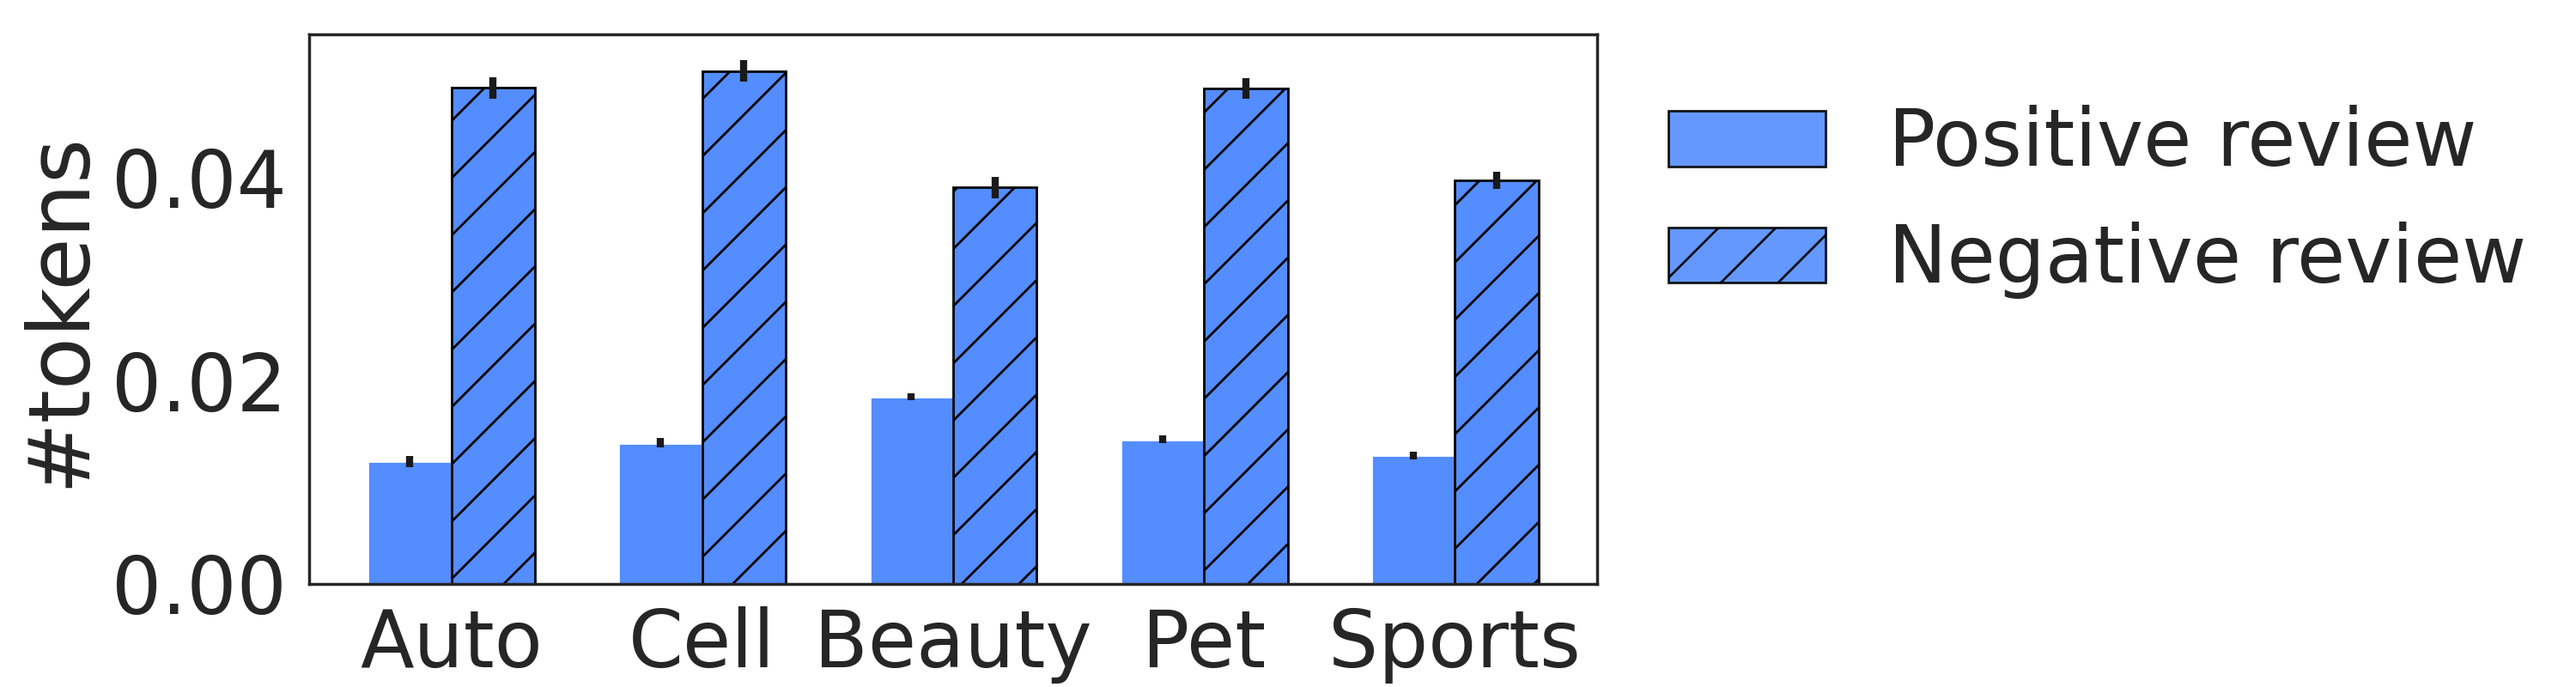

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


Saving the plot in  ../saves/vader_negation_only/vader_negation_only_dist_word_level_non_amz


<IPython.core.display.Javascript object>


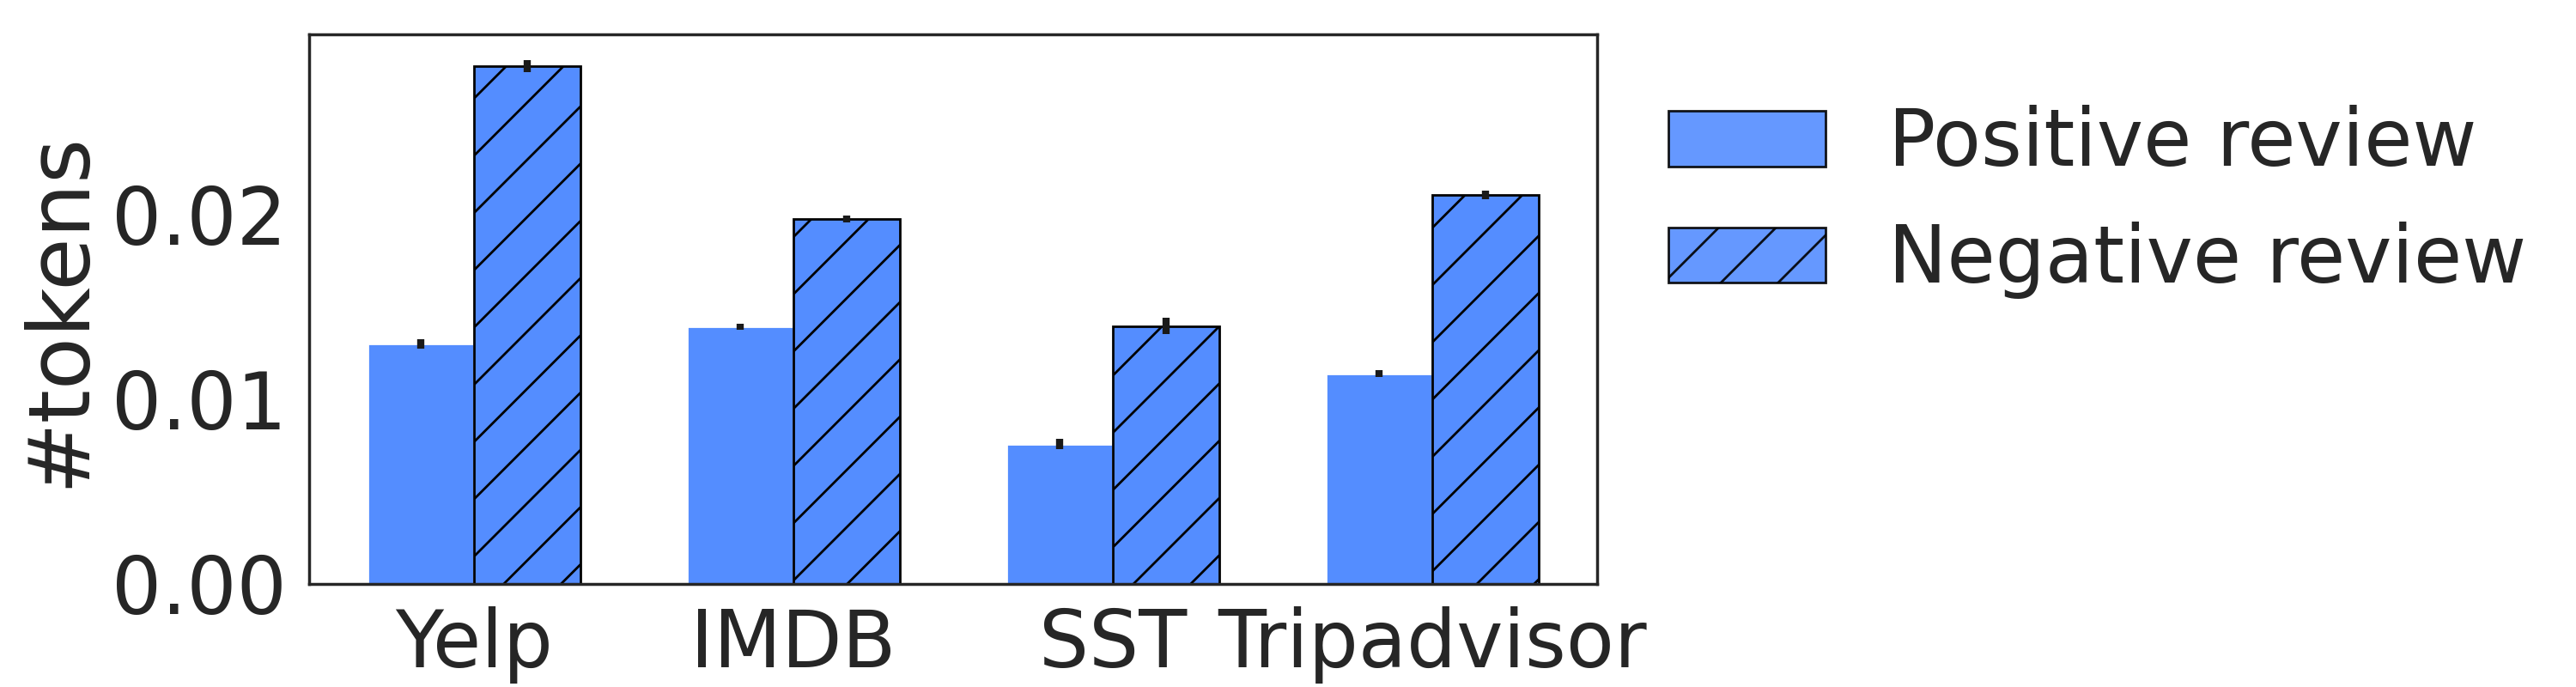

Saving the plot in  ../saves/vader_negation_only/vader_negation_only_dist_sent_level_amz


<IPython.core.display.Javascript object>


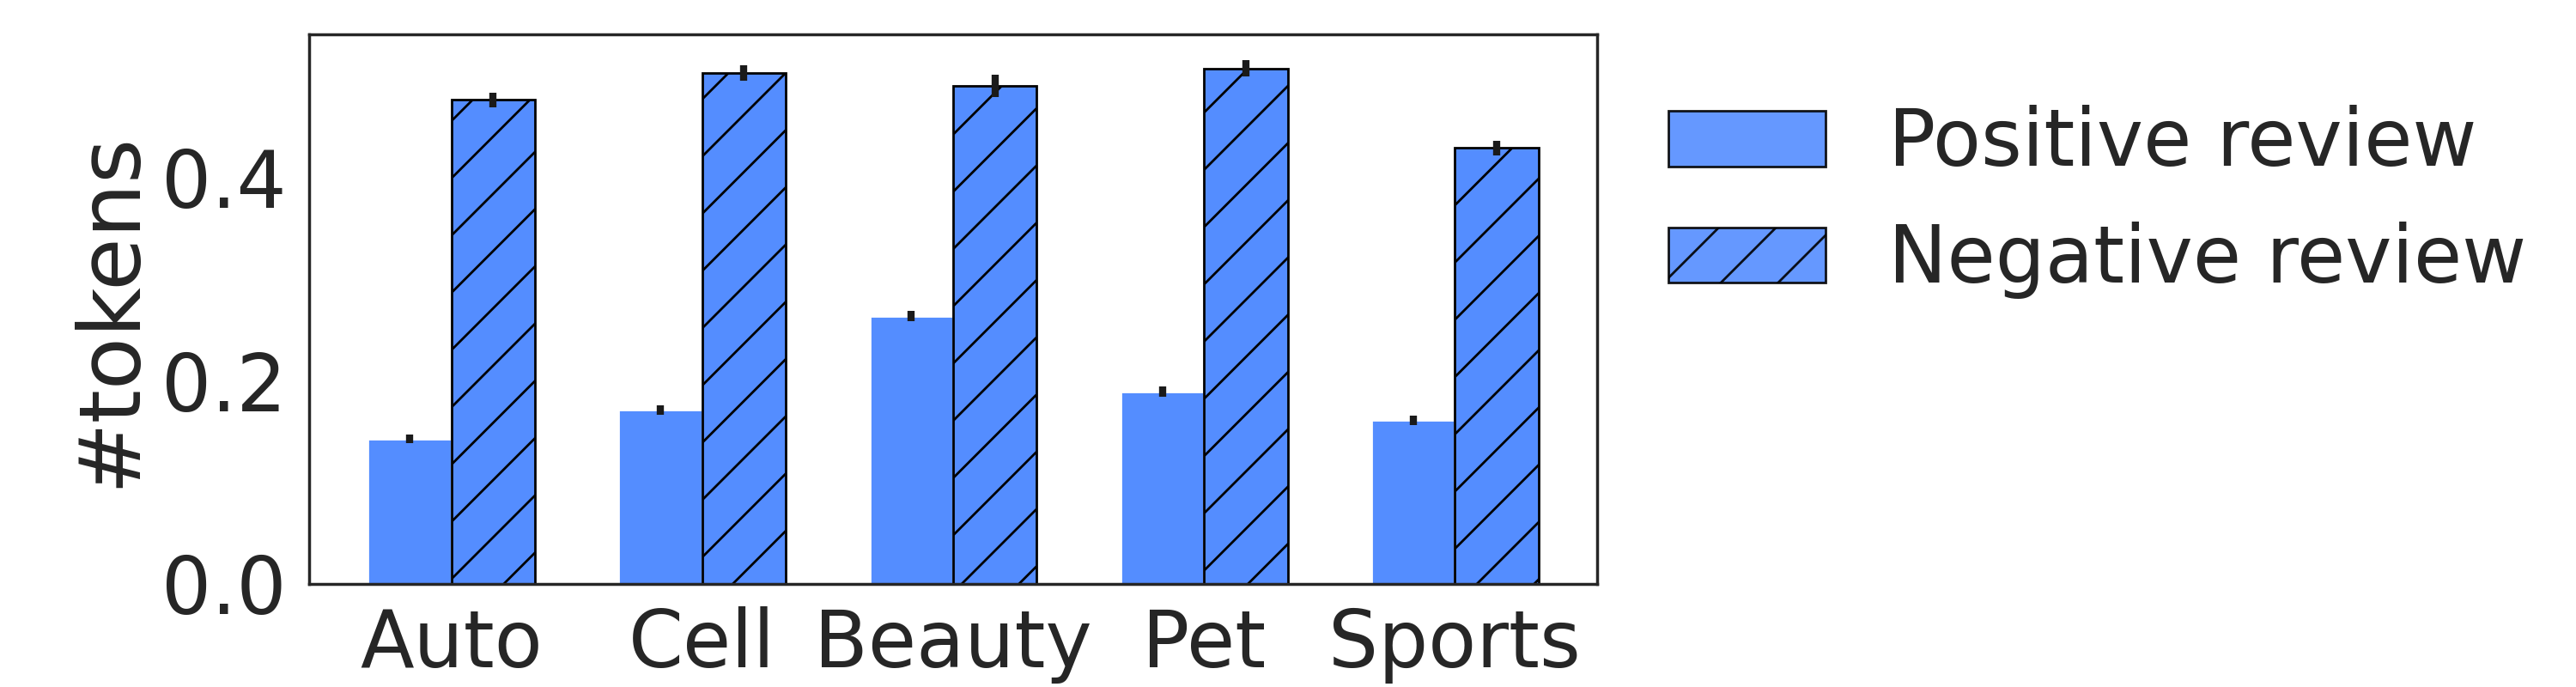

Saving the plot in  ../saves/vader_negation_only/vader_negation_only_dist_sent_level_non_amz


<IPython.core.display.Javascript object>


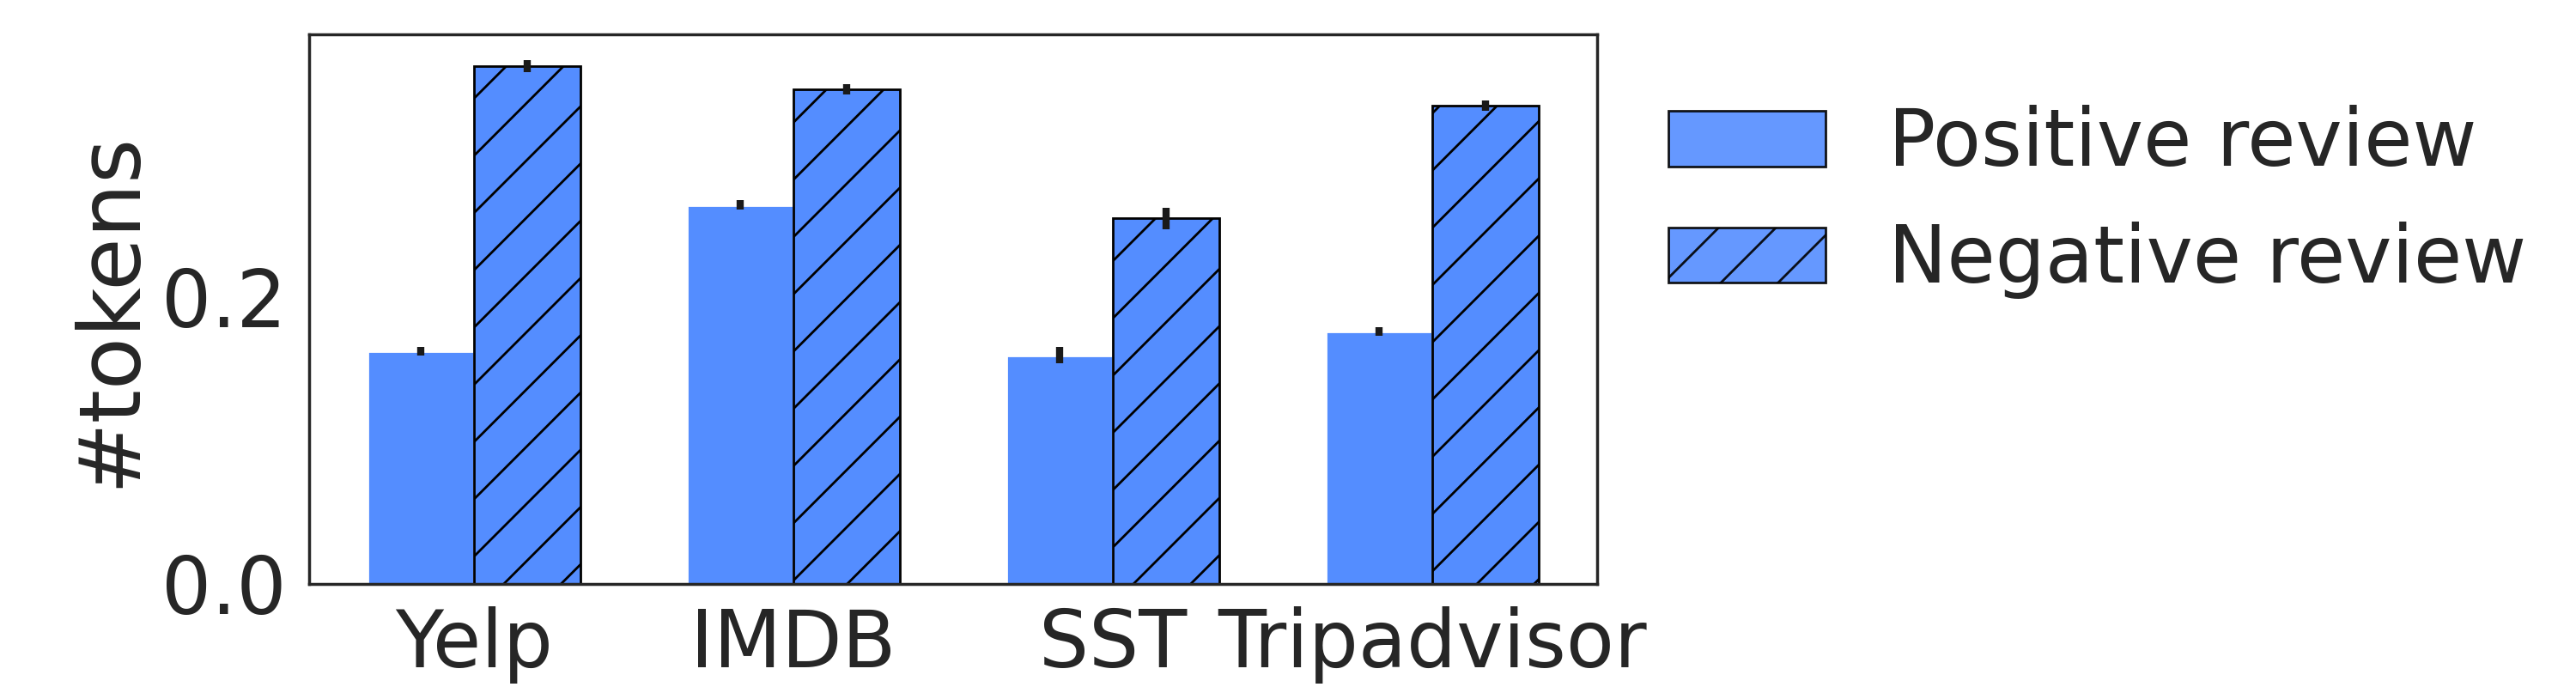

Saving the plot in  ../saves/vader_negation_only/vader_negation_only_dist_review_level_amz


<IPython.core.display.Javascript object>


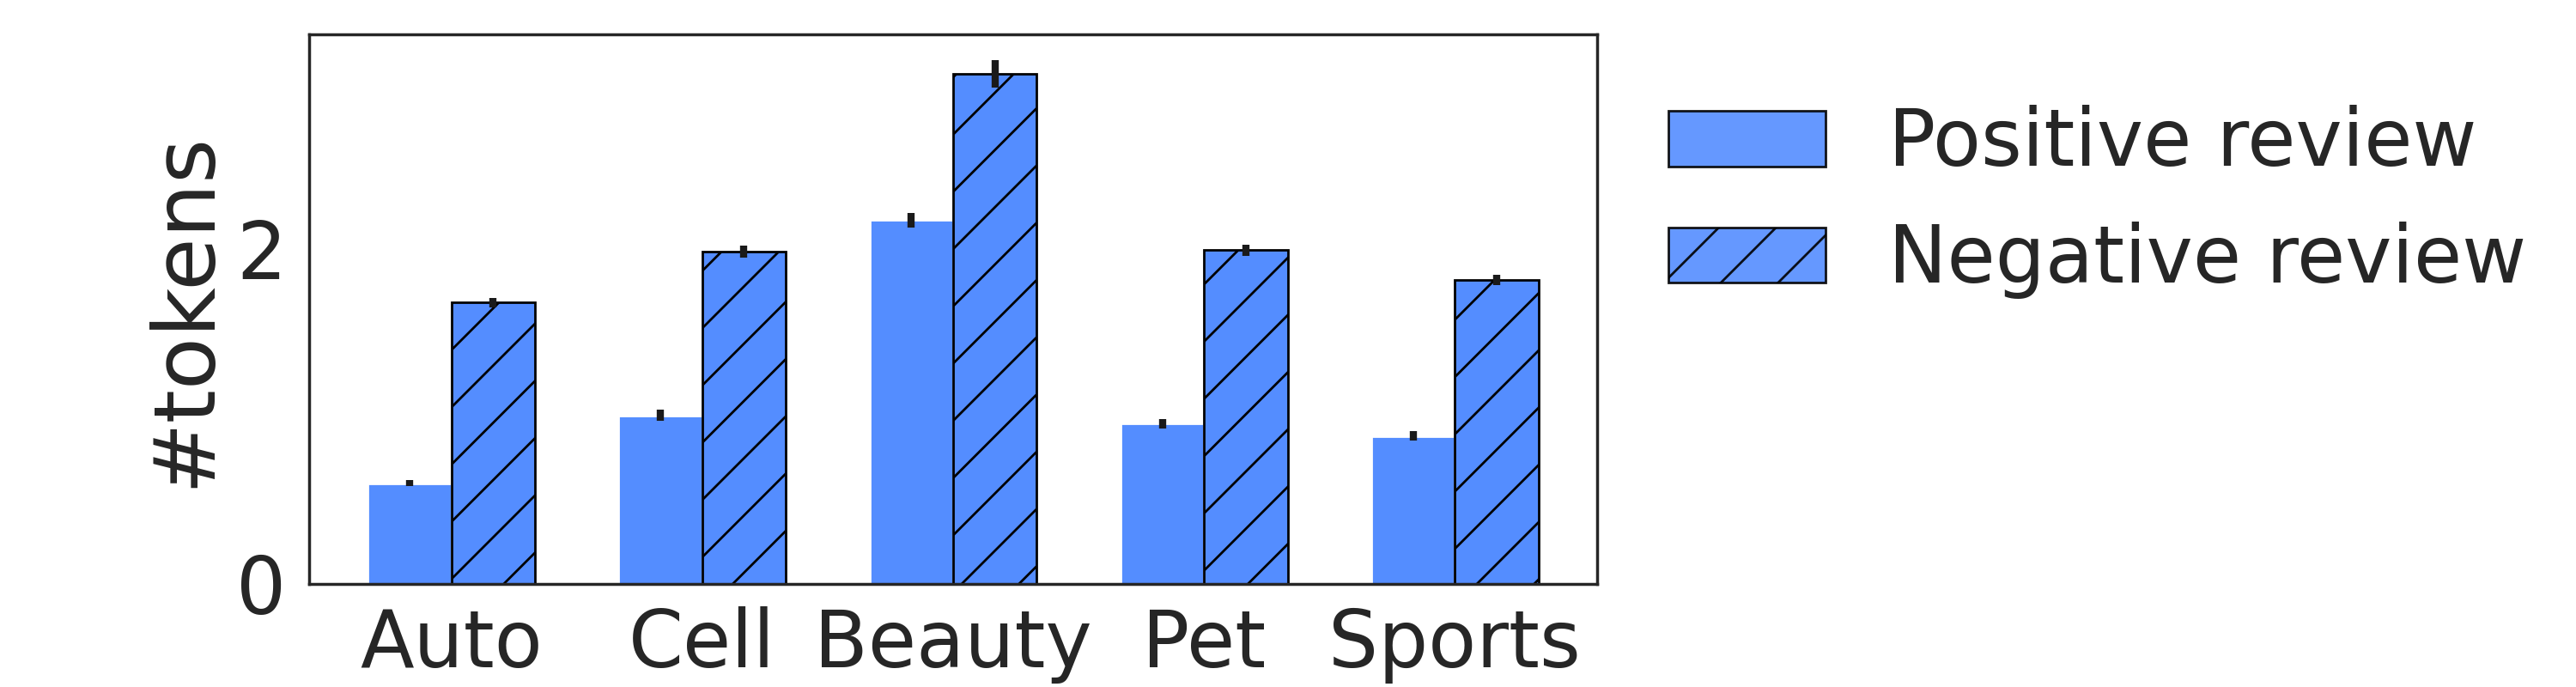

Saving the plot in  ../saves/vader_negation_only/vader_negation_only_dist_review_level_non_amz


<IPython.core.display.Javascript object>


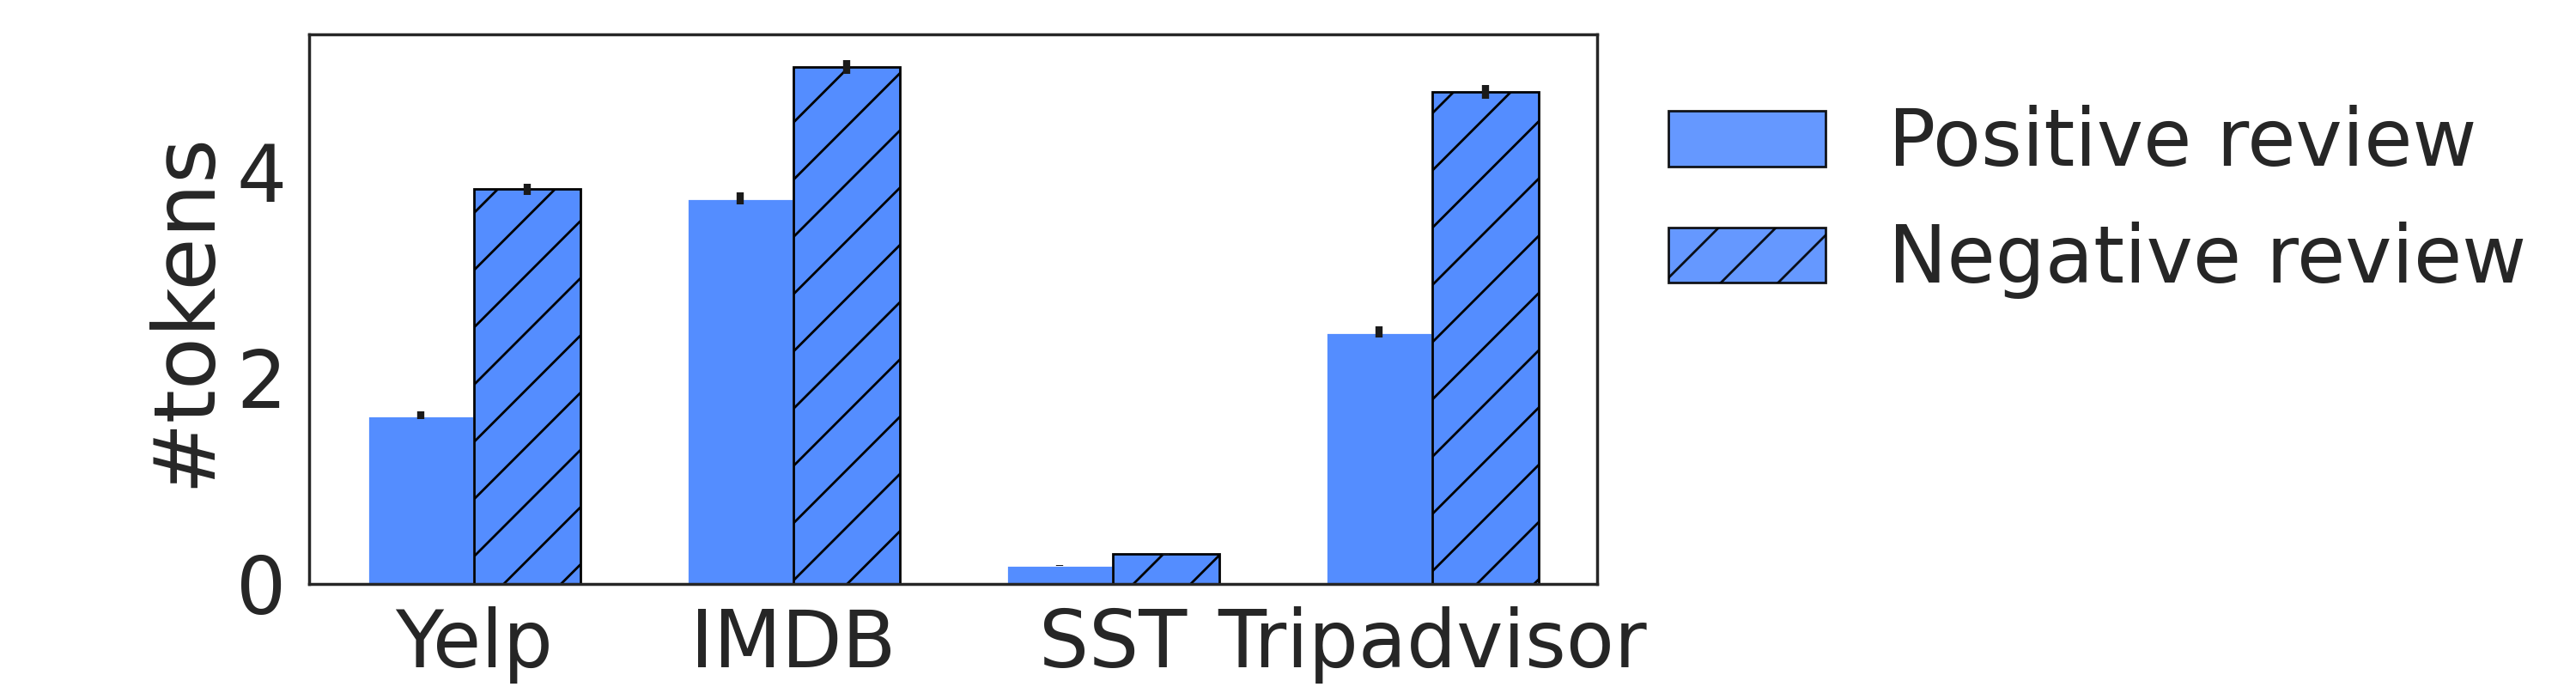

In [2]:
# Vader negation only distribution
saves_dir = os.path.join("../saves", "vader_negation_only")
Path(saves_dir).mkdir(parents=True, exist_ok=True)   
plot_save_prefix = "vader_negation_only_dist"

seed_vals = [23]
plot_data = {
    "word_level": [],
    "sent_level": [],
    "review_level": []
}
analysis_types = list(plot_data.keys())
plot_data = pickle.load(open(os.path.join(saves_dir, plot_save_prefix+".pickle"), "rb"))

reload(seaborn_plot_util)
for analysis in analysis_types:
    amazon_data, non_amazon_data = util.filter_amazon(plot_data[analysis])    

    seaborn_plot_util.draw_grouped_barplot_two_subbars(amazon_data, "name", "value", 
        "category", os.path.join(saves_dir, plot_save_prefix+"_"+analysis+"_amz"),
        figsize=(15, 4), 
        position=(0.12, 0.15, 0.5, 0.8),
        bbox_to_anchor=(1, 0.5, 0.2, 0.5), 
#         y_axis_name="\#tokens",
        amazon_data_flag=True)

    seaborn_plot_util.draw_grouped_barplot_two_subbars(non_amazon_data, "name", "value", 
        "category", os.path.join(saves_dir, plot_save_prefix+"_"+analysis+"_non_amz"),
        figsize=(15, 4), 
        position=(0.12, 0.15, 0.5, 0.8),
        bbox_to_anchor=(1, 0.5, 0.2, 0.5), 
#         y_axis_name="\#tokens",
        amazon_data_flag=False)

'word_level'
Saving the plot in  ../saves/vader_pos_neg_negation_dist/vader_pos_neg_negation_dist_word_level_non_amz


<IPython.core.display.Javascript object>


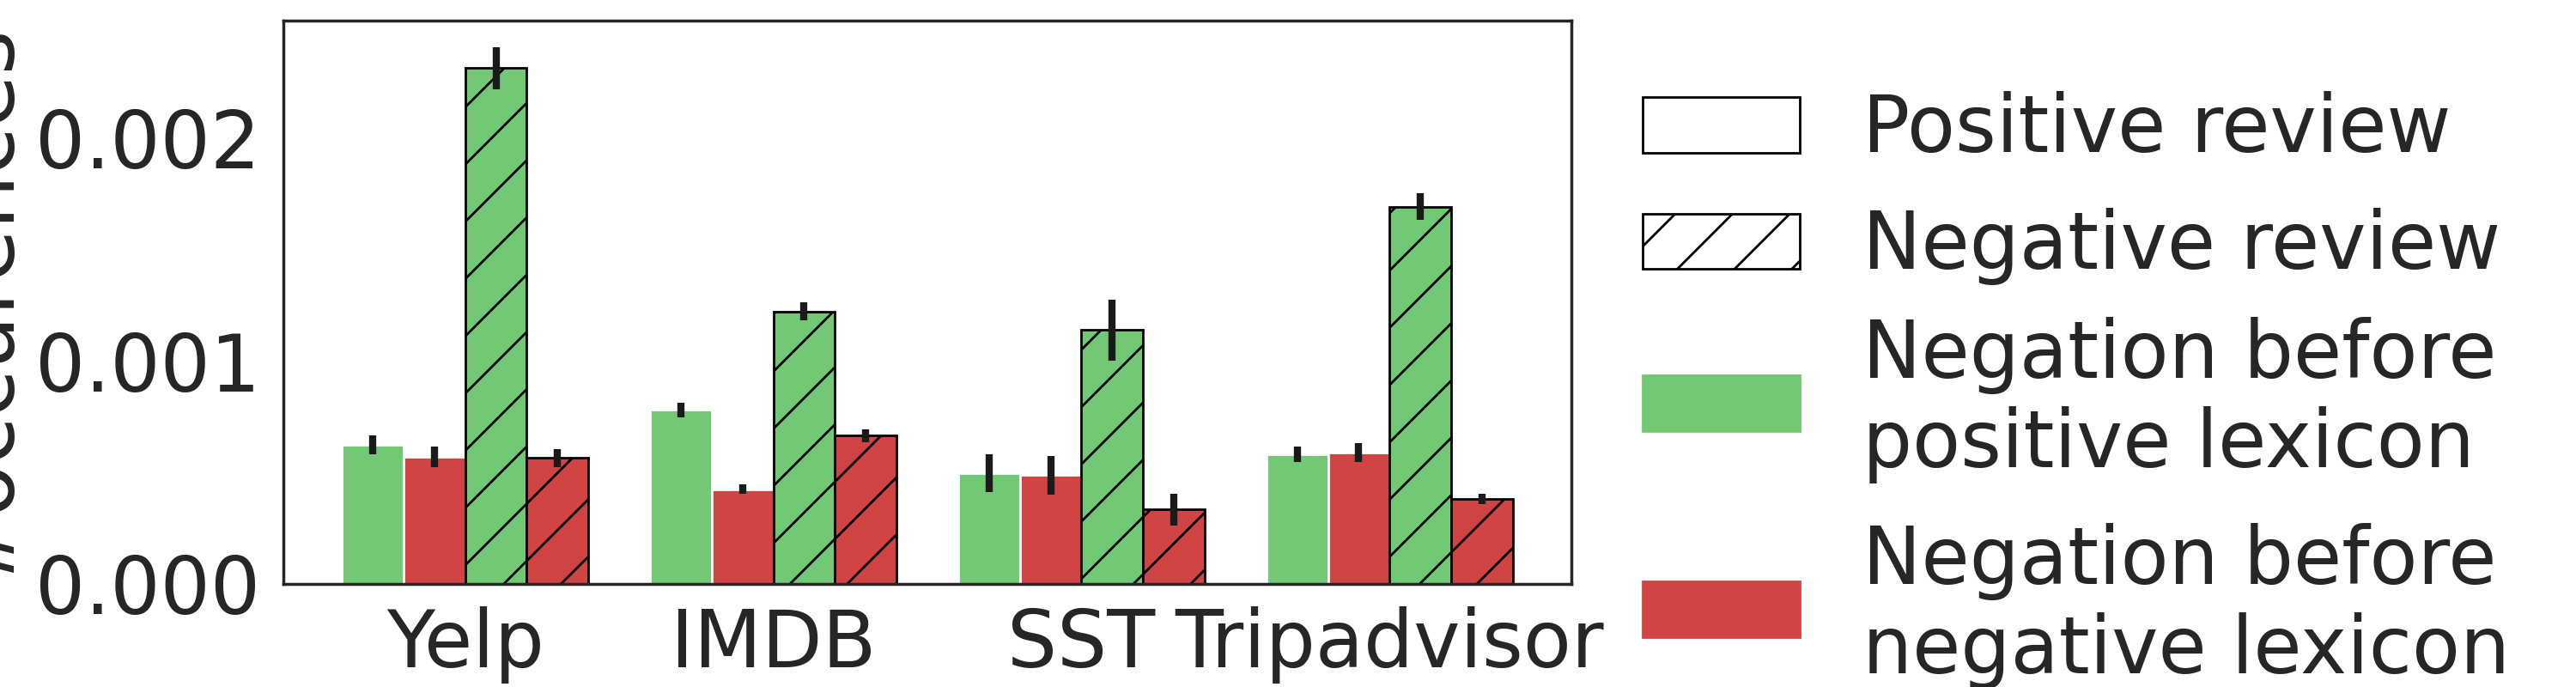

Saving the plot in  ../saves/vader_pos_neg_negation_dist/vader_pos_neg_negation_dist_word_level_amz


<IPython.core.display.Javascript object>


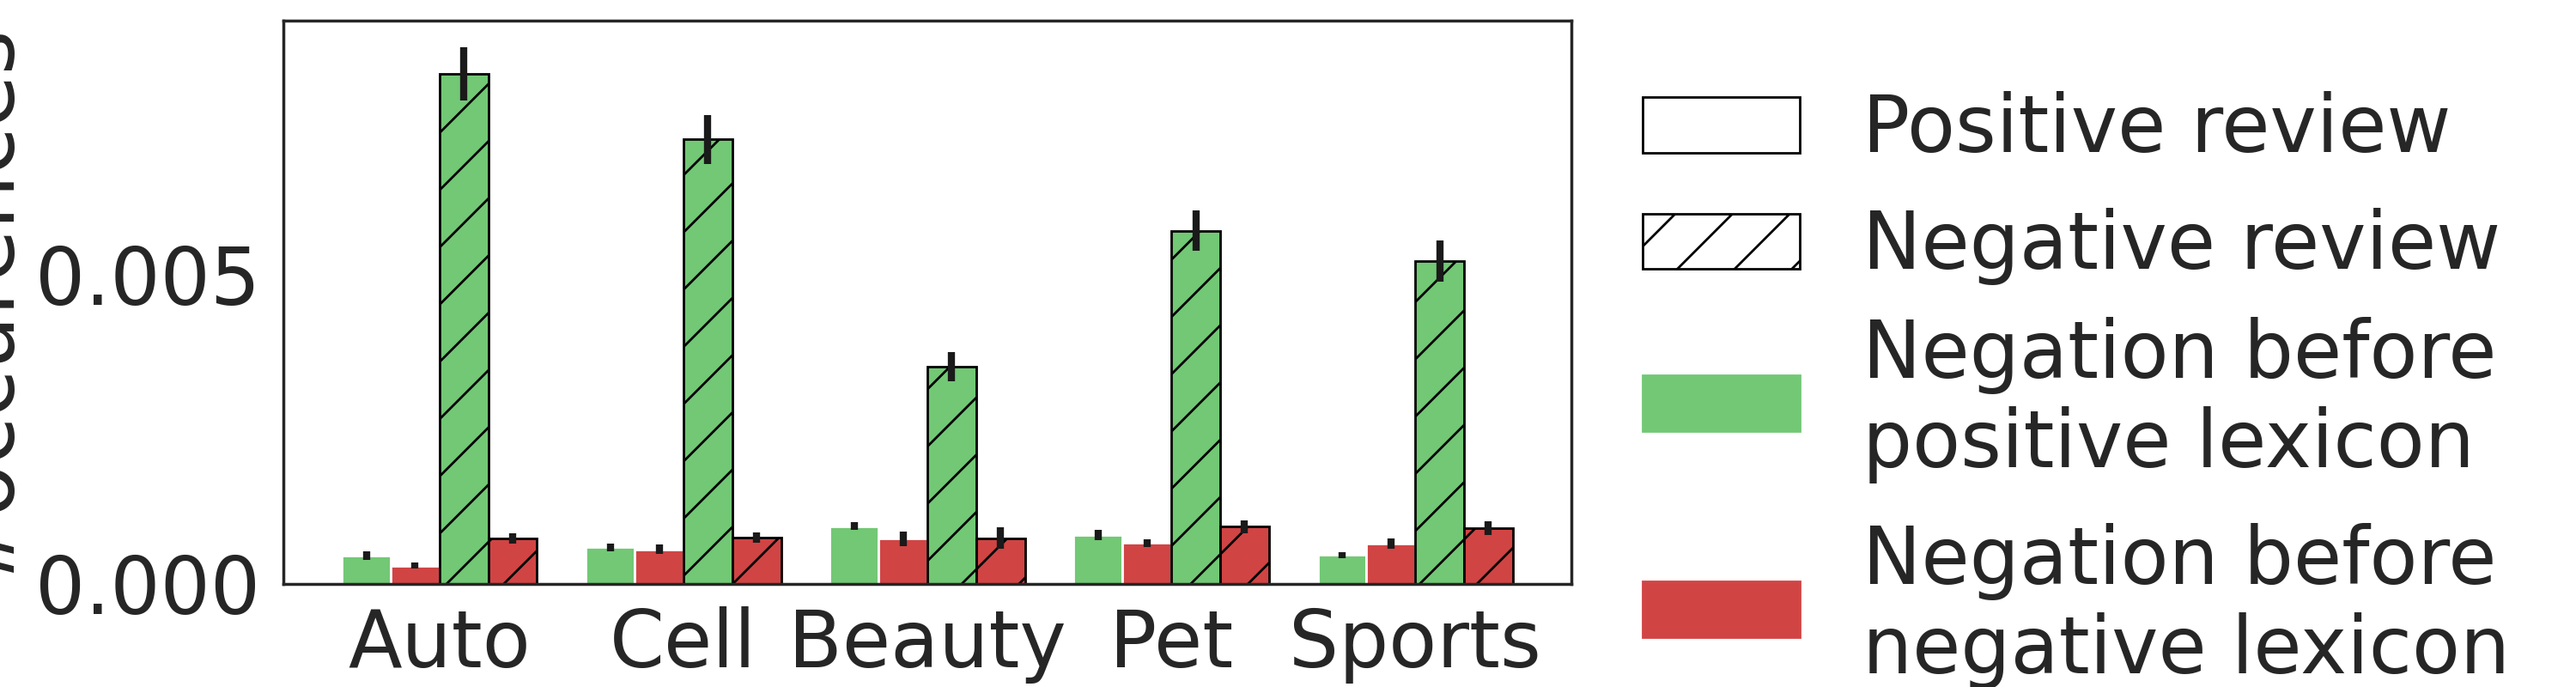

'sent_level'
Saving the plot in  ../saves/vader_pos_neg_negation_dist/vader_pos_neg_negation_dist_sent_level_non_amz


<IPython.core.display.Javascript object>


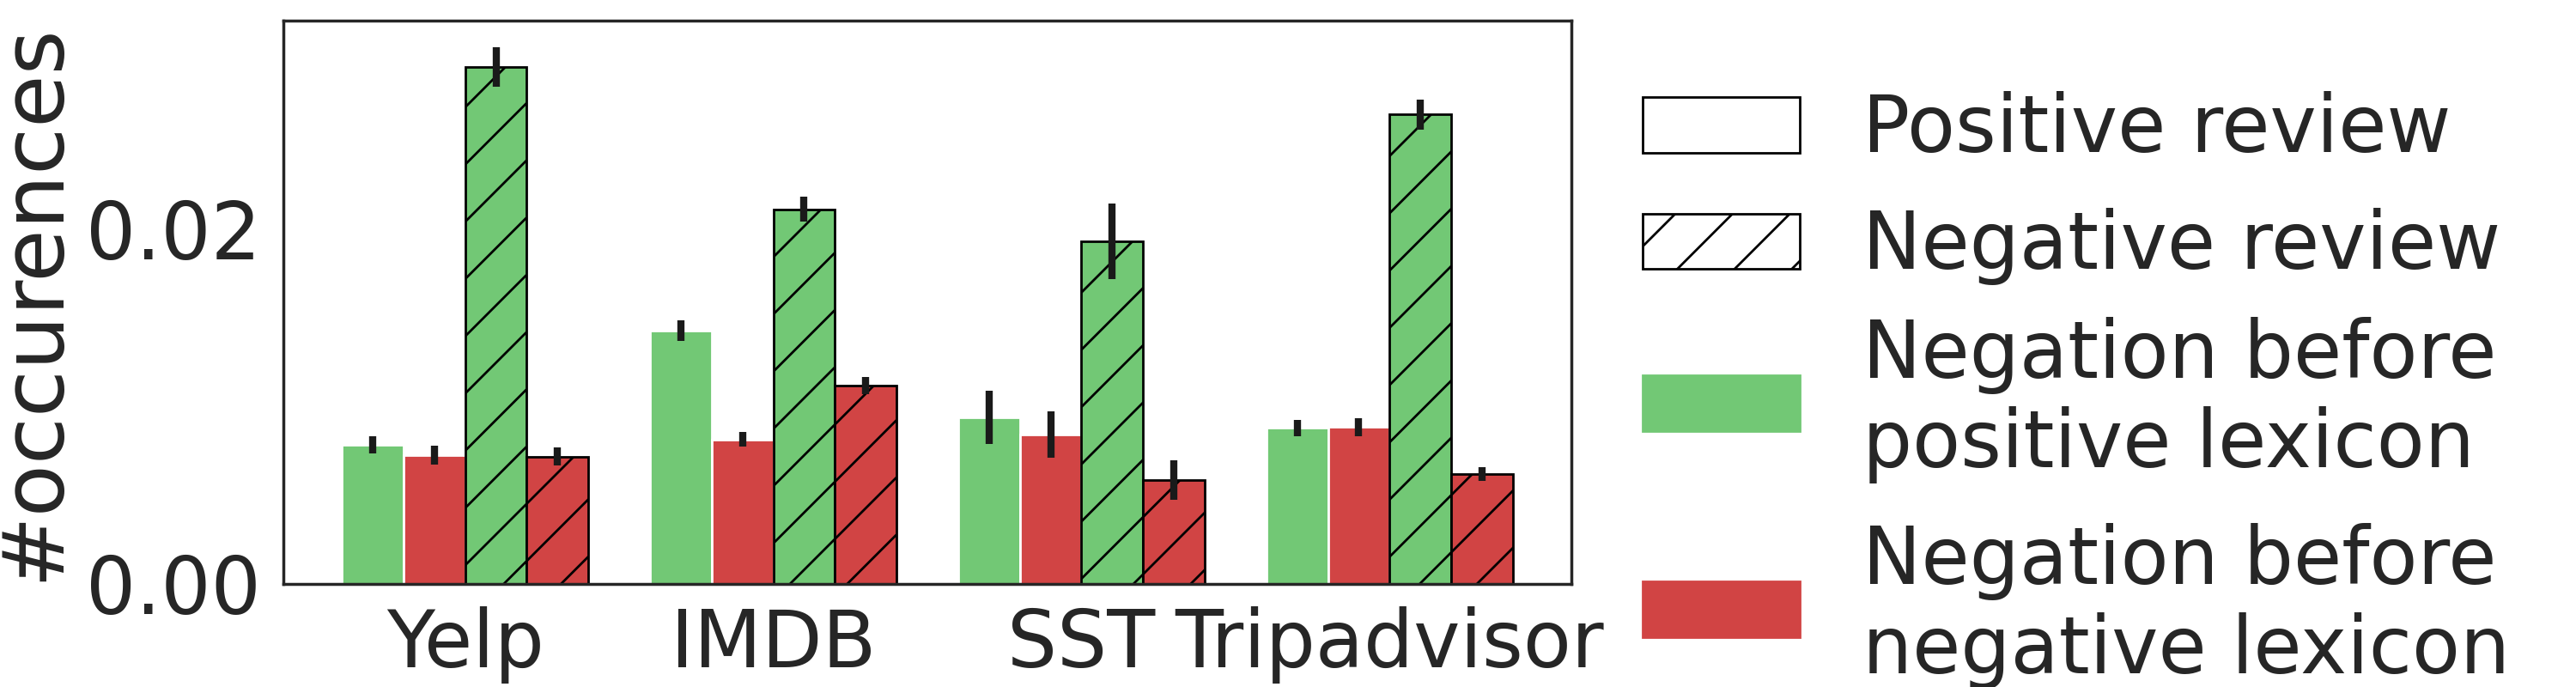

Saving the plot in  ../saves/vader_pos_neg_negation_dist/vader_pos_neg_negation_dist_sent_level_amz


<IPython.core.display.Javascript object>


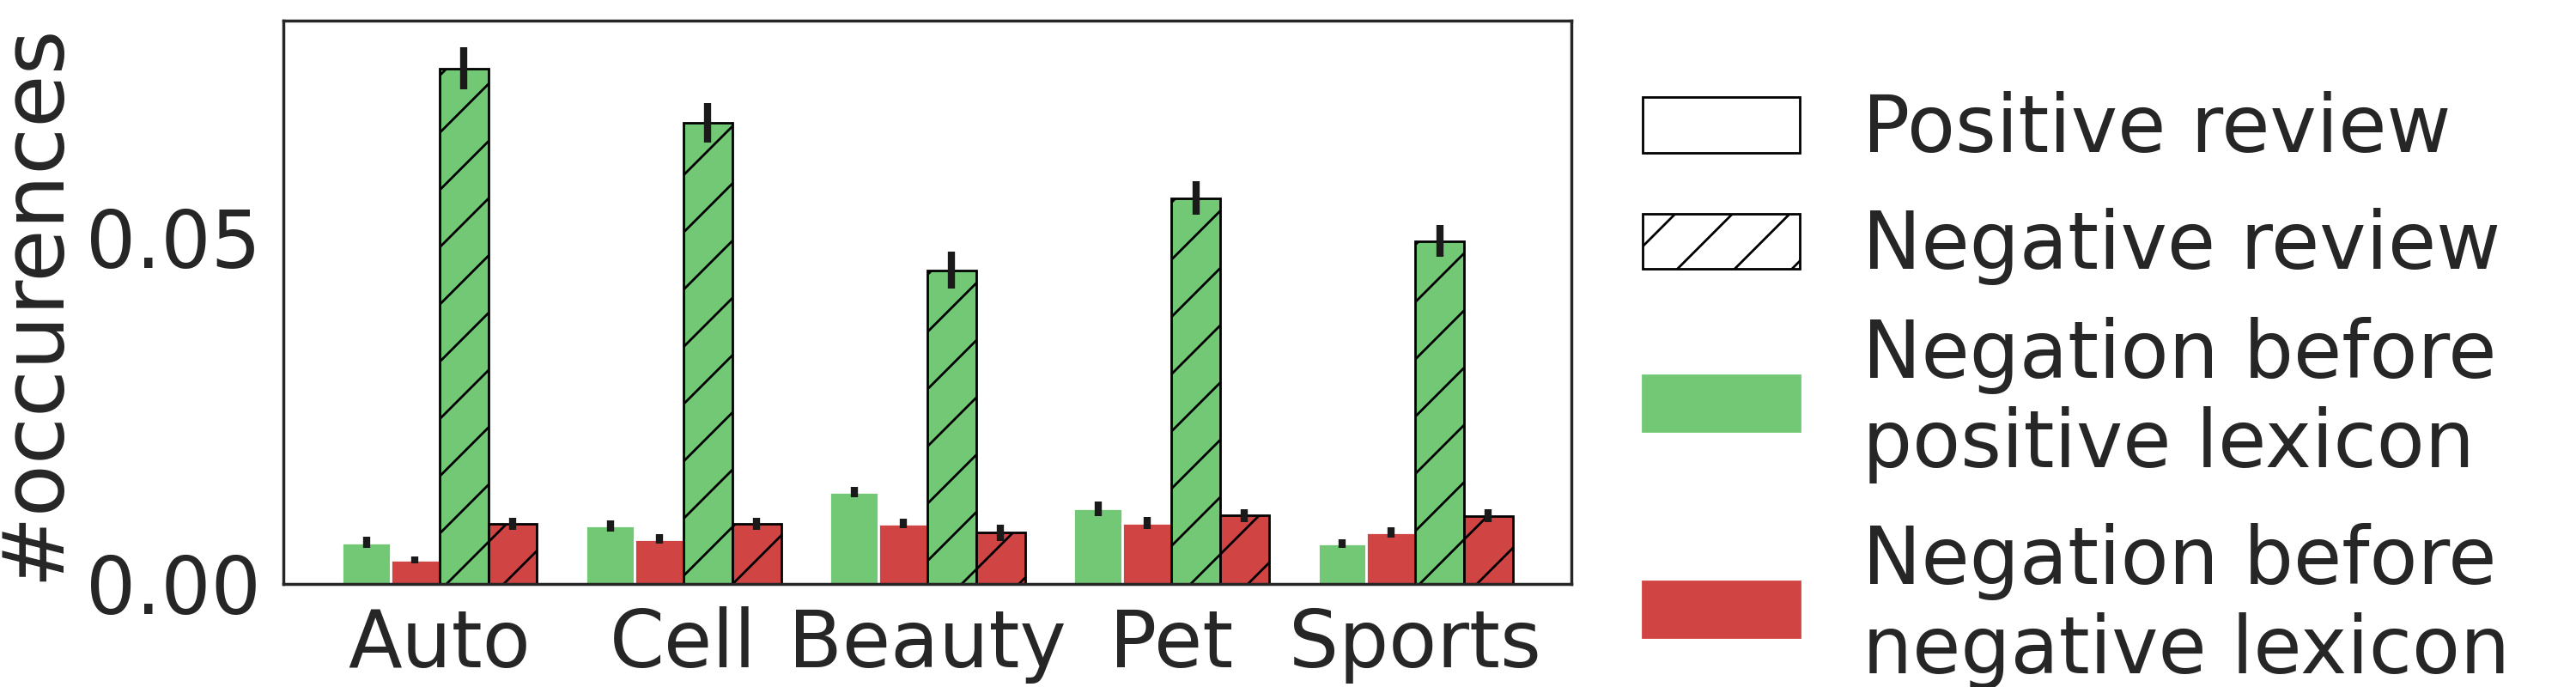

'review_level'
Saving the plot in  ../saves/vader_pos_neg_negation_dist/vader_pos_neg_negation_dist_review_level_non_amz


<IPython.core.display.Javascript object>


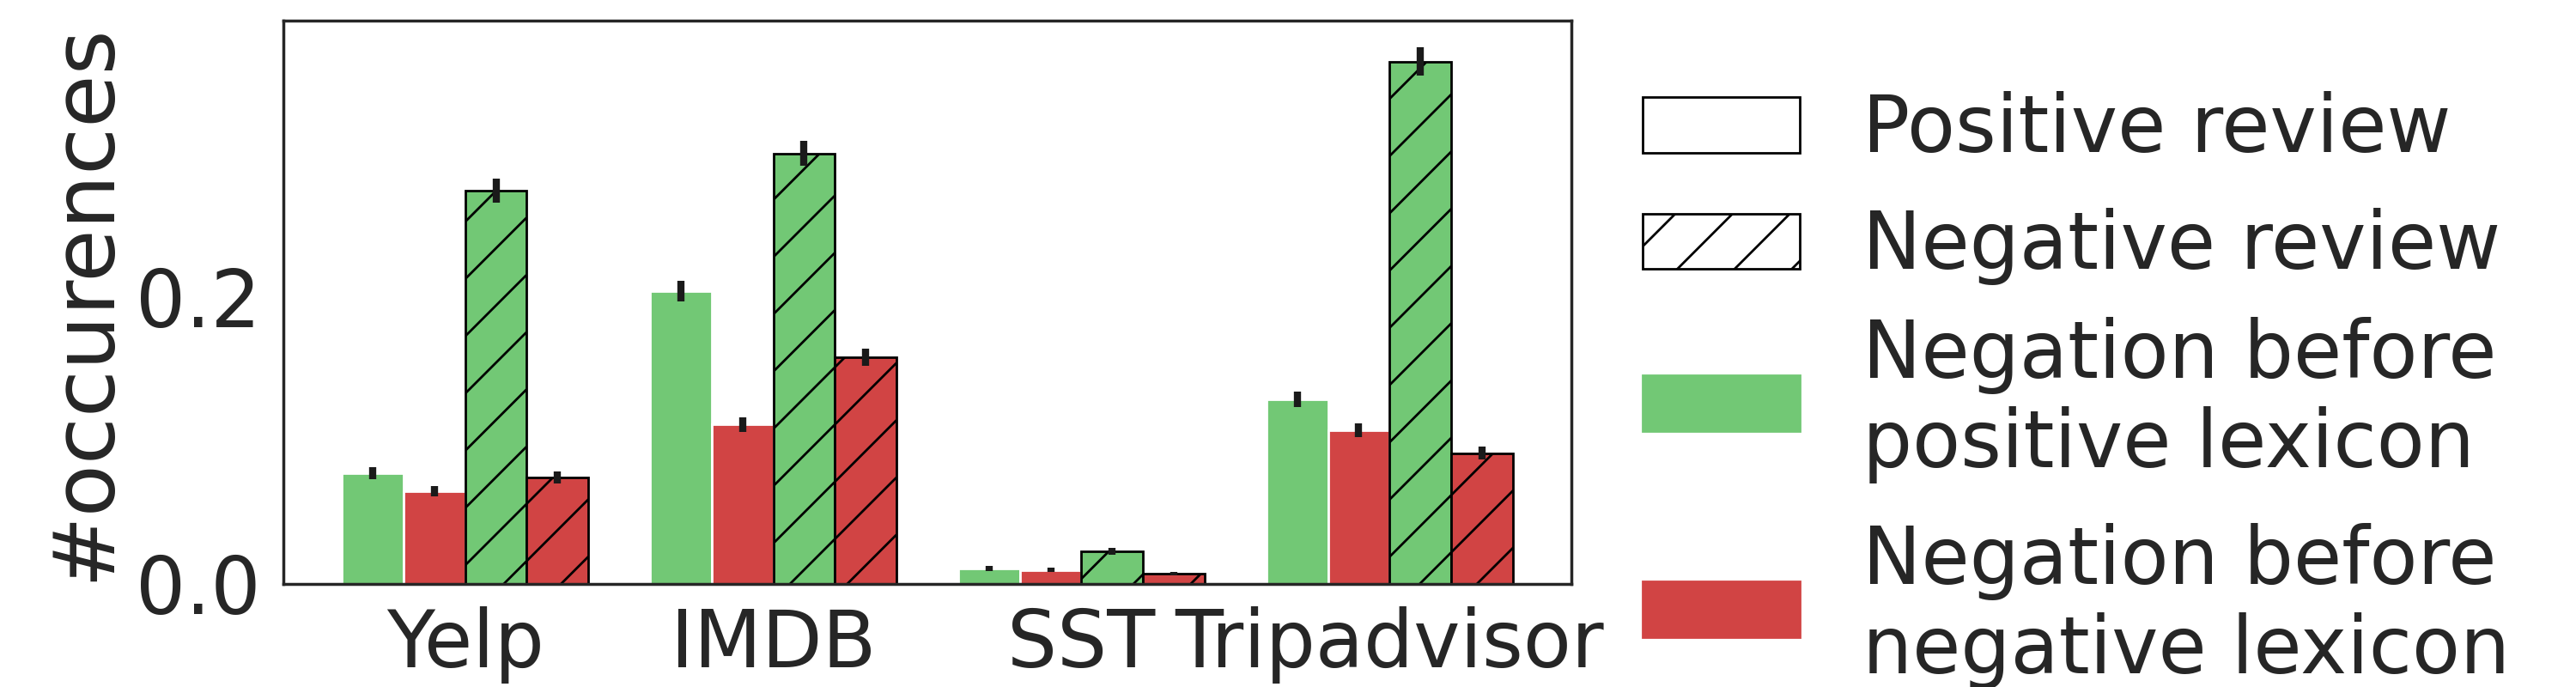

Saving the plot in  ../saves/vader_pos_neg_negation_dist/vader_pos_neg_negation_dist_review_level_amz


<IPython.core.display.Javascript object>


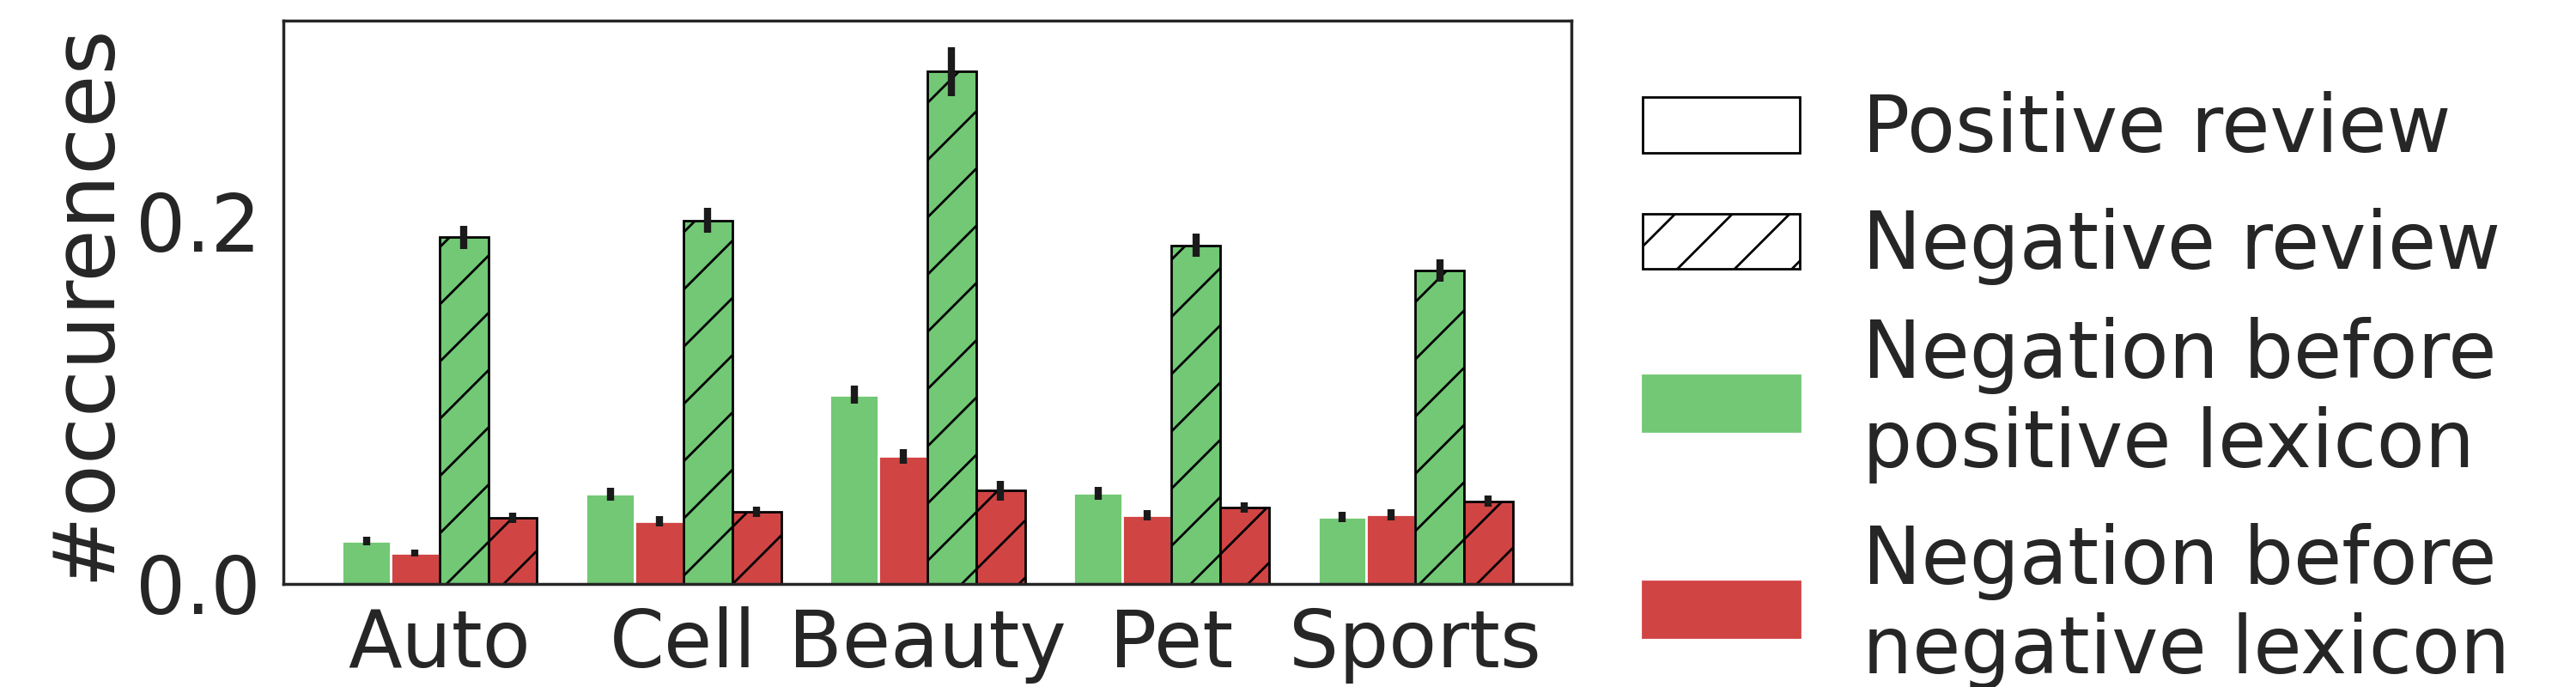

In [3]:
saves_dir = os.path.join("../saves", "vader_pos_neg_negation_dist")
Path(saves_dir).mkdir(parents=True, exist_ok=True) 
datasets = json.loads(open("../input.json").read())
preload_flag = True
plot_save_prefix = "vader_pos_neg_negation_dist"
analysis_types = [
    "word_level", 
    "sent_level", 
    "review_level"
]
plot_data = pickle.load(open(os.path.join(saves_dir, plot_save_prefix+".pickle"), "rb"))


for analysis in analysis_types: 
    myprint(analysis)
    amazon_data, non_amazon_data = util.filter_amazon(plot_data[analysis])
    seaborn_plot_util.draw_grouped_barplot_four_subbars(non_amazon_data, "name", "value", 
        "review category", "text sentiment",
        os.path.join(saves_dir, plot_save_prefix+"_"+analysis+"_non_amz"),
        figsize=(15, 4), position=(0.11, 0.15, 0.5, 0.82),
    #   ylim_top=None, 
        bbox_to_anchor=(1, 0.5, 0.2, 0.5),
        y_axis_name="#occurences",
        negation=True)
    seaborn_plot_util.draw_grouped_barplot_four_subbars(amazon_data, "name", "value", 
            "review category", "text sentiment",
            os.path.join(saves_dir,
            plot_save_prefix+"_"+str(analysis)+"_amz"),
            figsize=(15, 4), position=(0.11, 0.15, 0.5, 0.82),
#             ylim_top=None, 
            bbox_to_anchor=(1, 0.5, 0.2, 0.5),
            amazon_data_flag=True,
            y_axis_name="#occurences",
            negation=True)